In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
athlete_events = pd.read_csv('/content/drive/MyDrive/JJOO/Data/athlete_events.csv')

In [4]:
gdp_country = pd.read_csv('/content/drive/MyDrive/JJOO/Data/gdp_country.csv')

In [5]:
income_group = pd.read_csv('https://raw.githubusercontent.com/fridaruh/tableau_viz_games/master/Data/Income_group.csv')

In [6]:
noc_regions = pd.read_csv('https://raw.githubusercontent.com/fridaruh/tableau_viz_games/master/Data/noc_regions.csv')

In [7]:
athletes_df = athlete_events.merge(noc_regions, how = 'left', on = 'NOC')
athletes_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [8]:
athletes_df.rename(columns = {'region' : "Region", 'notes' : 'Notes'}, inplace = True)

In [9]:
athletes_df.drop(['Notes'], axis=1, inplace=True)

In [10]:
athletes_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region'],
      dtype='object')

In [11]:
(athletes_df.isnull().sum()/len(athletes_df)*100).sort_values(ascending=False)

Medal     85.326207
Weight    23.191180
Height    22.193821
Age        3.494445
Region     0.136473
Event      0.000000
Sport      0.000000
City       0.000000
Season     0.000000
Year       0.000000
Games      0.000000
NOC        0.000000
Team       0.000000
Sex        0.000000
Name       0.000000
ID         0.000000
dtype: float64

In [12]:
athletes_df.isnull().sum().sort_values(ascending=False)

Medal     231333
Weight     62875
Height     60171
Age         9474
Region       370
Event          0
Sport          0
City           0
Season         0
Year           0
Games          0
NOC            0
Team           0
Sex            0
Name           0
ID             0
dtype: int64

In [13]:
athletes_df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [14]:
athletes_df['Medal'] = athletes_df['Medal'].fillna('No')

In [15]:
athletes_df['Medal'].unique()

array(['No', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [16]:
weight_per_region = athletes_df.groupby(['Region','Sport'],as_index=False)[['Weight']].median()

In [17]:
weight_per_sport = athletes_df.groupby(['Sport'], as_index=False)[['Weight']].median()

In [18]:
weight_per_region.head()

,Region,Sport,Weight
0,Afghanistan,Athletics,64.0
1,Afghanistan,Boxing,54.0
2,Afghanistan,Football,NaN
3,Afghanistan,Hockey,NaN
4,Afghanistan,Judo,70.0


In [19]:
weight_per_region.rename(columns = {'Weight' : "Weight_M"}, inplace = True)
weight_per_sport.rename(columns = {'Weight' : "Weight_S"}, inplace = True)

In [20]:
weight_per_region.head()

,Region,Sport,Weight_M
0,Afghanistan,Athletics,64.0
1,Afghanistan,Boxing,54.0
2,Afghanistan,Football,NaN
3,Afghanistan,Hockey,NaN
4,Afghanistan,Judo,70.0


In [21]:
height_per_sport = athletes_df.groupby(['Sport'], as_index=False)[['Height']].median()

In [22]:
height_per_sport.head()

,Sport,Height
0,Aeronautics,NaN
1,Alpine Skiing,173.0
2,Alpinism,NaN
3,Archery,172.0
4,Art Competitions,175.0


In [23]:
height_per_sport.rename(columns = {'Height' : "Height_S"}, inplace = True)

In [24]:
height_per_region = athletes_df.groupby(['Region','Sport'],as_index=False)[['Height']].median()

In [25]:
height_per_region.rename(columns = {'Height' : "Height_M"}, inplace = True)
height_per_sport.rename(columns = {'Height' : "Height_S"}, inplace = True)

In [26]:
age_per_region = athletes_df.groupby(['Region','Sport'],as_index=False)[['Age']].median()

In [27]:
age_per_sport = athletes_df.groupby(['Sport'], as_index=False)[['Age']].median()

In [28]:
age_per_region.rename(columns = {'Age' : "Age_M"}, inplace = True)
age_per_sport.rename(columns = {'Age' : "Age_S"}, inplace = True)

In [29]:
athletes_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region'],
      dtype='object')

In [30]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,Netherlands


In [31]:
athletes_df = athletes_df.merge(weight_per_region[['Weight_M','Region','Sport']], how = 'left', on = ['Region','Sport'])

In [32]:
athletes_df = athletes_df.merge(height_per_region[['Height_M','Region','Sport']], how = 'left', on =['Region','Sport'])
athletes_df = athletes_df.merge(age_per_region[['Age_M','Region','Sport']], how = 'left', on = ['Region','Sport'])

In [33]:
athletes_df = athletes_df.merge(weight_per_sport[['Weight_S','Sport']], how = 'left', on = ['Sport'])
athletes_df = athletes_df.merge(height_per_sport[['Height_S','Sport']], how = 'left', on =['Sport'])
athletes_df = athletes_df.merge(age_per_sport[['Age_S','Sport']], how = 'left', on = ['Sport'])

In [34]:
athletes_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region',
       'Weight_M', 'Height_M', 'Age_M', 'Weight_S', 'Height_S', 'Age_S'],
      dtype='object')

In [35]:
athletes_df['Weight'] = np.where(athletes_df['Weight'].isnull(),athletes_df['Weight_M'],athletes_df['Weight'] )

In [36]:
athletes_df['Height'] = np.where(athletes_df['Height'].isnull(),athletes_df['Height_M'],athletes_df['Height'] )
athletes_df['Age'] = np.where(athletes_df['Age'].isnull(),athletes_df['Age_M'],athletes_df['Age'] )

In [37]:
athletes_df['Weight'] = np.where(athletes_df['Weight'].isnull(),athletes_df['Weight_S'],athletes_df['Weight'] )
athletes_df['Height'] = np.where(athletes_df['Height'].isnull(),athletes_df['Height_S'],athletes_df['Height'] )
athletes_df['Age'] = np.where(athletes_df['Age'].isnull(),athletes_df['Age_S'],athletes_df['Age'] )

In [38]:
(athletes_df.isnull().sum()/len(athletes_df)*100).sort_values(ascending=False)

Weight_M    1.268461
Height_M    1.165553
Age_M       0.189587
Region      0.136473
Weight_S    0.080040
Weight      0.080040
Height      0.036516
Height_S    0.036516
Age_S       0.000000
NOC         0.000000
Name        0.000000
Sex         0.000000
Age         0.000000
Team        0.000000
Season      0.000000
Games       0.000000
Year        0.000000
City        0.000000
Sport       0.000000
Event       0.000000
Medal       0.000000
ID          0.000000
dtype: float64

In [39]:
athletes_df.isnull().sum().sort_values(ascending=False)

Weight_M    3439
Height_M    3160
Age_M        514
Region       370
Weight_S     217
Weight       217
Height        99
Height_S      99
Age_S          0
NOC            0
Name           0
Sex            0
Age            0
Team           0
Season         0
Games          0
Year           0
City           0
Sport          0
Event          0
Medal          0
ID             0
dtype: int64

In [40]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Weight_M,Height_M,Age_M,Weight_S,Height_S,Age_S
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,China,85.0,192.0,24.0,85.0,190.0,25.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,China,70.0,171.0,25.0,73.0,174.0,25.0
2,3,Gunnar Nielsen Aaby,M,24.0,183.0,76.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No,Denmark,76.0,183.0,23.0,71.0,175.0,23.0
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,NaN,34.0,95.0,182.0,29.0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,Netherlands,72.0,180.0,24.0,70.0,174.0,24.0


In [41]:
athletes_df.rename(columns = {'NOC' : "Country Code"}, inplace = True)
gdp_country.rename(columns = {'Time' : "Year"}, inplace = True)

In [42]:
athletes_df.drop(['Weight_M', 'Height_M', 'Age_M', 'Weight_S', 'Height_S', 'Age_S'], axis=1, inplace=True)

In [43]:
gdp_country.head()

,Year,Country Name,Country Code,GDP
0,1990,Afghanistan,AFG,NaN
1,1990,Albania,ALB,2.028554e+09
2,1990,Algeria,DZA,6.204856e+10
3,1990,American Samoa,ASM,NaN
4,1990,Andorra,AND,1.029048e+09


In [44]:
gdp_country['Year'].tail(10)

3182    2020
3183    2020
3184    2020
3185    2020
3186    2020
3187    2020
3188    2020
3189    2020
3190    2020
3191    2020
Name: Year, dtype: int64

In [45]:
gdp_country['Year'].astype(int)

0       1990
1       1990
2       1990
3       1990
4       1990
        ... 
3187    2020
3188    2020
3189    2020
3190    2020
3191    2020
Name: Year, Length: 3192, dtype: int64

In [46]:
athletes_df = athletes_df.merge(gdp_country[['Year','Country Code','GDP']], how = 'left', on = ['Country Code','Year'])

In [47]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country Code,Games,Year,Season,City,Sport,Event,Medal,Region,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,China,8.532230e+12
2,3,Gunnar Nielsen Aaby,M,24.0,183.0,76.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,Netherlands,NaN


In [48]:
(athletes_df.isnull().sum()/len(athletes_df)*100).sort_values(ascending=False)

GDP             86.912982
Region           0.136473
Weight           0.080040
Height           0.036516
Country Code     0.000000
Name             0.000000
Sex              0.000000
Age              0.000000
Team             0.000000
Games            0.000000
Year             0.000000
Season           0.000000
City             0.000000
Sport            0.000000
Event            0.000000
Medal            0.000000
ID               0.000000
dtype: float64

In [49]:
athletes_df.to_csv('abt_final.csv')

In [50]:
df = athletes_df.dropna(subset = ["GDP"])

In [51]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Region          0.267749
GDP             0.000000
Country Code    0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
Height          0.000000
Weight          0.000000
Team            0.000000
Games           0.000000
Year            0.000000
Season          0.000000
City            0.000000
Sport           0.000000
Event           0.000000
Medal           0.000000
ID              0.000000
dtype: float64

In [52]:
df.shape

(35481, 17)

# Modelo

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [54]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country Code,Games,Year,Season,City,Sport,Event,Medal,Region,GDP
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,China,8.532230e+12
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No,Finland,1.257070e+11
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,No,Finland,1.257070e+11
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,2.744970e+11
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,No,Finland,1.257070e+11


In [55]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'Country Code',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region',
       'GDP'],
      dtype='object')

In [56]:
df = df.drop(['ID', 'Name'], axis=1)

In [57]:
corrMatrix = df.corr()

In [58]:
dimensiones = (12,9)

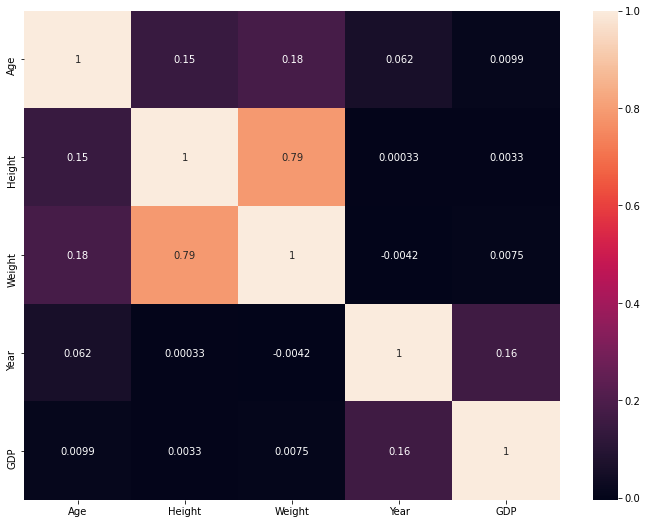

In [59]:
fig, ax = plt.subplots(figsize=dimensiones)
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [60]:
Y = np.where(df['Medal']!= 'No', 1,0)

In [61]:
Y_2 = pd.DataFrame(Y, columns=['Medals'])

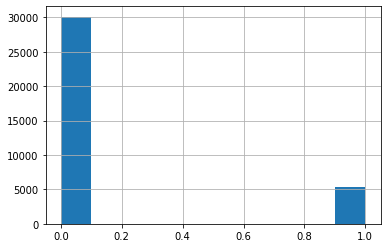

In [62]:
Y_2['Medals'].hist()

In [63]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
pre_x = df[['Sex', 'Age', 'Height', 'Weight', 
        'Season',  'Region',
       'GDP']]
pre_x = pd.get_dummies(pre_x, columns=['Sex',
        'Season',  'Region'])

In [65]:
pre_x.columns

Index(['Age', 'Height', 'Weight', 'GDP', 'Sex_F', 'Sex_M', 'Season_Summer',
       'Season_Winter', 'Region_Afghanistan', 'Region_Albania',
       ...
       'Region_Tunisia', 'Region_Turkey', 'Region_Turkmenistan', 'Region_UK',
       'Region_USA', 'Region_Uganda', 'Region_Ukraine', 'Region_Uzbekistan',
       'Region_Venezuela', 'Region_Yemen'],
      dtype='object', length=124)

In [66]:
X=pre_x

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=6)

In [68]:
from sklearn import tree

In [69]:
t = tree.DecisionTreeClassifier(max_depth=7, random_state=99) 

In [70]:
model = t.fit(x_train, y_train)

In [71]:
y_pred = t.predict(x_test)

In [72]:
model.score(x_train, y_train) 

0.8537556369785795

In [73]:
model.score(x_test, y_test) #Calificacion 3 ramas

0.8469775961673947

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
y_predicc = model.predict(X)

In [76]:
print(classification_report(Y, y_predicc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     30096
           1       0.66      0.06      0.10      5385

    accuracy                           0.85     35481
   macro avg       0.76      0.53      0.51     35481
weighted avg       0.83      0.85      0.80     35481



In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
roc_auc_score(y_test, y_pred)

0.5154557457573911

In [79]:
from sklearn.tree import export_text

In [80]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,GDP,0.272828
2,Weight,0.196155
1,Height,0.131737
94,Region_Russia,0.083800
0,Age,0.053016
...,...,...
41,Region_Eritrea,0.000000
40,Region_Egypt,0.000000
39,Region_Ecuador,0.000000
38,Region_Dominican Republic,0.000000


In [81]:
importancia_predictores.to_excel('importancia_predictores.xlsx')

In [82]:
importancia_predictores.head(15)

,predictor,importancia
0,Age,0.053016
1,Height,0.131737
2,Weight,0.196155
3,GDP,0.272828
4,Sex_F,0.050109
5,Sex_M,0.040844
6,Season_Summer,0.023863
7,Season_Winter,0.000000
8,Region_Afghanistan,0.000000
9,Region_Albania,0.000000
